In [1]:
from collections import defaultdict
from tqdm import tqdm

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from ctt.data_loading.loader import ContactDataset

In [3]:
DATA_PATH = "/Users/nrahaman/Python/ctt/data/payload/sim_v2_people-1000_days-22_init-0.001_seed-2_20200527-214120.zip"
dataset = ContactDataset(path=DATA_PATH, preload=True)


In [4]:
samples = defaultdict(list)

for idx in tqdm(range(len(dataset))):
    sample = dataset[idx]
    for key in sample:
        samples[key].append(sample[key])

100%|██████████| 68000/68000 [00:22<00:00, 3027.48it/s]


In [5]:
for key in samples:
    if key.startswith("encounter"):
        continue
    samples[key] = torch.stack(samples[key]).numpy()

In [19]:
def filter_thresh(x, thresh=0.):
    x = np.asarray(x)
    x = x[x > thresh]
    return x

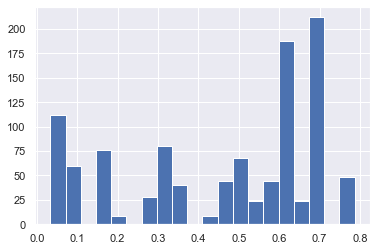

In [13]:
plt.figure()
plt.hist(filter_thresh(samples["infectiousness_history"][:, :, 0]), bins=20)
plt.show()

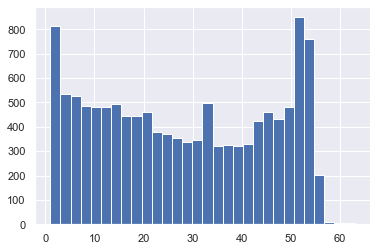

In [17]:
valid_encounter_messages = [msg for msg in samples["encounter_message"] if msg.numel() > 0]

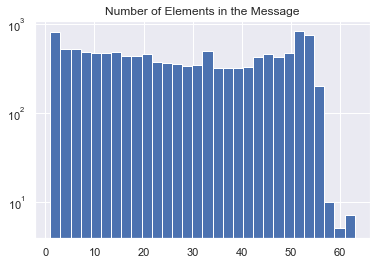

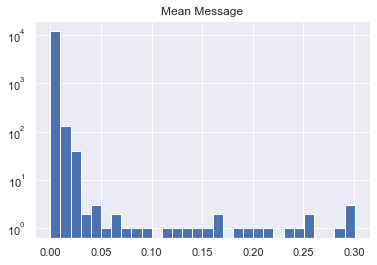

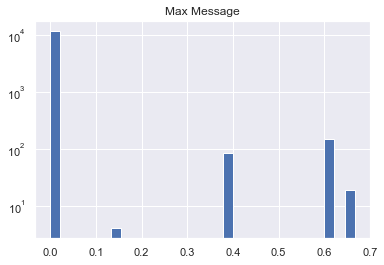

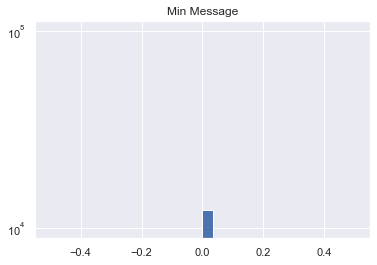

In [25]:
plt.figure()
plt.title("Number of Elements in the Message")
plt.hist([msg.numel() for msg in valid_encounter_messages], bins=30, log=True)
plt.show()

plt.figure()
plt.title("Mean Message")
plt.hist(([msg.mean().item() for msg in valid_encounter_messages]),
         bins=30, log=True)
plt.show()

plt.figure()
plt.title("Max Message")
plt.hist([msg.max().item() for msg in valid_encounter_messages], bins=30, log=True)
plt.show()

plt.figure()
plt.title("Min Message")
plt.hist([msg.min().item() for msg in valid_encounter_messages], bins=30, log=True)
plt.show()


In [40]:
infectiousness_and_max_message = [(samples["infectiousness_history"][idx, :, 0].max(),
                                   samples["encounter_message"][idx].max().item())
                                  for idx in range(len(samples["encounter_message"]))
                                  if samples["encounter_message"][idx].numel() > 0]

infectiousness, max_message = zip(*infectiousness_and_max_message)
infectiousness, max_message = np.asarray(infectiousness), np.asarray(max_message)

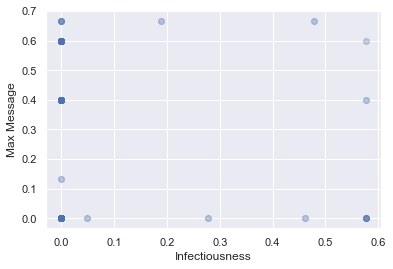

In [42]:
plt.figure()
plt.scatter(infectiousness, max_message, alpha=0.1)
plt.xlabel("Infectiousness")
plt.ylabel("Max Message")
plt.show()

In [44]:
contagions_and_messages = [(samples["encounter_is_contagion"][idx][:, 0],
                            samples["encounter_message"][idx][:, 0])
                           for idx in range(len(samples["encounter_is_contagion"]))
                           if samples["encounter_is_contagion"][idx].numel() > 0]

contagions, messages = zip(*contagions_and_messages)
contagions, messages = torch.cat(contagions), torch.cat(messages)

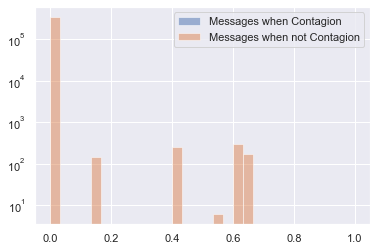

In [53]:
plt.figure()
plt.hist(messages[contagions == 1], log=True, bins=20, alpha=0.5, label="Messages when Contagion")
plt.hist(messages[contagions == 0], log=True, bins=20, alpha=0.5, label="Messages when not Contagion")
plt.legend()
plt.show()

In [55]:
import os
os.path.basename(PATH)

'sim_v2_people-1000_days-22_init-0.001_seed-2_20200527-214120.zip'